In [1]:
#Maximum Likelihood Estimation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
#read csv
df=pd.read_csv('datasets/listings.csv')

#try plot in 1000
ds=df.head(1000)

In [3]:
#find highest correlation to define parameter 
df.corr(method='pearson')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.541770,-0.112042,-0.004701,0.049324,-0.083037,-0.341513,0.199958,0.245014,0.113259
host_id,0.541770,1.000000,-0.041237,-0.016341,0.038802,-0.089862,-0.175573,0.169950,-0.063522,0.041840
latitude,-0.112042,-0.041237,1.000000,-0.034970,-0.073990,0.084924,-0.015022,-0.029580,-0.149961,-0.068740
longitude,-0.004701,-0.016341,-0.034970,1.000000,-0.030436,-0.029208,0.102109,0.117578,0.049416,-0.035727
price,0.049324,0.038802,-0.073990,-0.030436,1.000000,-0.012214,-0.042013,0.000920,0.016555,0.017451
minimum_nights,-0.083037,-0.089862,0.084924,-0.029208,-0.012214,1.000000,-0.076475,-0.139469,-0.013964,0.150356
number_of_reviews,-0.341513,-0.175573,-0.015022,0.102109,-0.042013,-0.076475,1.000000,0.627965,-0.149681,-0.066658
reviews_per_month,0.199958,0.169950,-0.029580,0.117578,0.000920,-0.139469,0.627965,1.000000,-0.195962,-0.108243
calculated_host_listings_count,0.245014,-0.063522,-0.149961,0.049416,0.016555,-0.013964,-0.149681,-0.195962,1.000000,0.246230
availability_365,0.113259,0.041840,-0.068740,-0.035727,0.017451,0.150356,-0.066658,-0.108243,0.246230,1.000000


C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reviews_per_month', ylabel='number_of_reviews'>

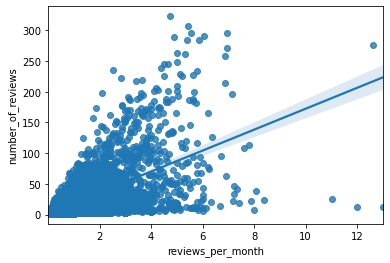

In [4]:
#highest correlation number_of_reviews and reviews_per_month 0.62
x = df['reviews_per_month']
y = df['number_of_reviews']
sns.regplot(x,y)

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='number_of_reviews', ylabel='reviews_per_month'>

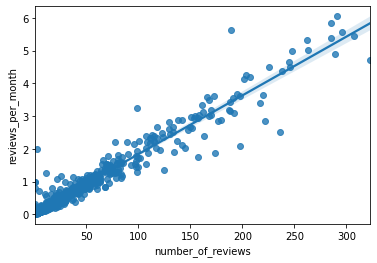

In [5]:
#try plot in 1000
a = ds['number_of_reviews']
b = ds['reviews_per_month']
sns.regplot(a,b)

In [6]:
x = df['number_of_reviews']
y = df['reviews_per_month']
y=y.fillna(method='ffill')
sm.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      reviews_per_month   R-squared (uncentered):                   0.349
Model:                            OLS   Adj. R-squared (uncentered):              0.349
Method:                 Least Squares   F-statistic:                              4235.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):                        0.00
Time:                        17:13:19   Log-Likelihood:                         -13535.
No. Observations:                7907   AIC:                                  2.707e+04
Df Residuals:                    7906   BIC:                                  2.708e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
number_of_reviews     0.0303      0.000     65.079      0.000       0.029       0.031
==============================================================================
Omnibus:                     3831.341   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34102.006
Skew:                           2.131   Prob(JB):                         0.00
Kurtosis:                      12.238   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
def MLE(param):
    intercept, beta, sd = param[0], param[1], param[2]
    yhat = intercept + beta*x
    negLL = -np.sum(stats.norm.logpdf(y, loc=yhat, scale=sd) )
    return(negLL)

In [8]:
i=input("Intercept = ")
b=input("Beta = ")
s=input("Sd = ")

Intercept = 100
Beta = 200
Sd = 300


In [9]:
test = np.array([i,b,s]) #param0,param1,param2
result = minimize(MLE, test, method = 'Nelder-Mead',options={'disp': True})

Optimization terminated successfully.
         Current function value: 12062.941452
         Iterations: 219
         Function evaluations: 401


In [10]:
result

 final_simplex: (array([[0.81377285, 0.02036312, 1.11256577],
       [0.8137228 , 0.0203642 , 1.11256859],
       [0.81378977, 0.02036452, 1.11254583],
       [0.81382356, 0.02036395, 1.11257155]]), array([12062.94145207, 12062.94145534, 12062.94145596, 12062.94146207]))
           fun: 12062.941452069872
       message: 'Optimization terminated successfully.'
          nfev: 401
           nit: 219
        status: 0
       success: True
             x: array([0.81377285, 0.02036312, 1.11256577])